Task 1: Iris Flower Classification

In [ ]:
#Import libraries
#Import numpy and pandas for data processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#importing dataset
df= pd.read_csv('/content/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# Display first 5 records
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Display the last 5 records
df.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# displays the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# check for duplicate values
dup= df.duplicated().sum()
print(f'There are {dup} duplicate values')

There are 0 duplicate values


In [ ]:
# check for missing values
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
#columns of dataset
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
#check for unique target varible in 'Species' column
unique_lab=df['Species'].unique()
print(unique_lab)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


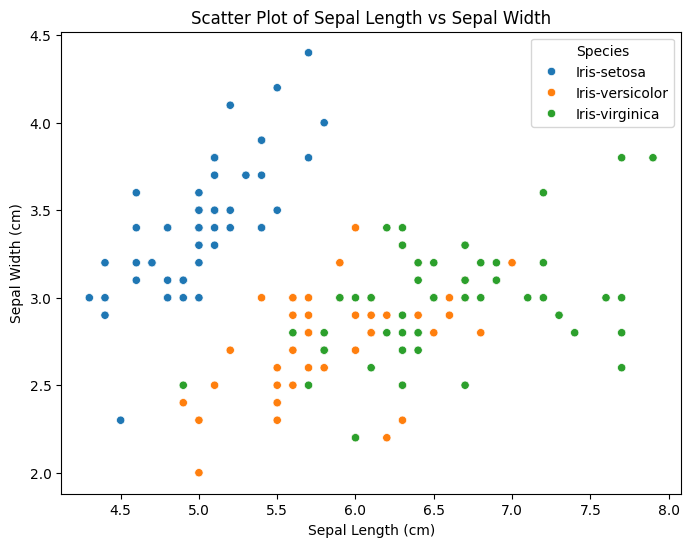

In [ ]:
#import seaborn for visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

In [ ]:
# Classification using KNN and Random forest algorithm

#import libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#Feature and Target
X=df.drop(columns=['Species'])
Y=df['Species']

In [ ]:
#split the data
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=42)

In [ ]:
#train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train) # Train the KNN classifier using training data
knn_predication = knn.predict(X_test) # Make predictions on the test data

knn_acc= accuracy_score(Y_test, knn_predication)
knn_report= classification_report(Y_test, knn_predication)
knn_confusion= confusion_matrix(Y_test, knn_predication)

In [ ]:
knn_acc= accuracy_score(Y_test, knn_predication)
knn_report= classification_report(Y_test, knn_predication)
knn_confusion= confusion_matrix(Y_test, knn_predication)

In [ ]:
print("KNN results:")
print(f"Accuracy: {knn_acc}")
print("Classification Report:\n", knn_report)

KNN results:
Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)
rf_predictiom= rf.predict(X_test)
# Evaluate
rf_acc= accuracy_score(Y_test, rf_predictiom)
rf_report= classification_report(Y_test, rf_predictiom)

In [ ]:
print("Random Forest results:")
print(f"Accuracy: {rf_acc}")
print("Classification Report:\n", rf_report)

Random Forest results:
Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
from sklearn.model_selection import cross_val_score
rf_scores = cross_val_score(rf, X, Y, cv=5)
print("Cross-validation scores:", rf_scores)
print("Mean accuracy:", rf_scores.mean())

Cross-validation scores: [0.86666667 1.         1.         1.         0.86666667]
Mean accuracy: 0.9466666666666667


In [ ]:
#inputting a set of measurements and using the model to predict
#Input:
input= [[135, 6.2, 5.3, 2.2,1.5]]

#convert input into dataframe
input_df= pd.DataFrame(input,columns=X.columns)

#Predict using KNN
knn_prediction = knn.predict(input_df)
print("KNN Prediction:", knn_prediction)

#Predict using Random Forest
rf_prediction = rf.predict(input_df)
print("Random Forest Prediction:", rf_prediction)

KNN Prediction: ['Iris-virginica']
Random Forest Prediction: ['Iris-virginica']
